# Lecture 188 Real World Application: Handwritten Digits Recognition:

#### Example 2:  Handwritten Digits
##### MNIST dataset contains 70,000 pictures of handwritten numbers
##### Each handwritten number is digitised as a 28 x 28 matrix of greyscales 0 -255
##### The correct digit (label) is determined by humans and given in the label column

###### Step 1: load the MINST dataset, Understand and Separate X and y

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [14]:
mnist = pd.read_csv(r'../Resources/Section_30/mnist.csv')

# The vectors have been flattened:
mnist

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
69995      2    0    0    0    0    0    0    0    0    0  ...      0      0   
69996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
69997      4    0    0    0    0    0    0    0    0    0  ...      0      0   
69998      5    0    0    0    0    0    0    0    0    0  ...      0      0   
69999      6    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0          0      0      0      0      0      0      0      0  
1          0      0      0      0      0      0      0      0  
2          0      0      0      0      0      0      0      0  
3          0      0      0      0      0      0      0      0  
4          0      0      0      0      0      0      0      0  
...      ...    ...    ...    ...    ...    ...    ...    ...  
69995      0      0      0      0      0      0      0      0  
69996      0      0      0      0      0      0      0      0  
69997      0      0      0      0      0      0      0      0  
69998      0      0      0      0      0      0      0      0  
69999      0      0      0      0      0      0      0      0  

[70000 rows x 785 columns]

In [83]:
# Convert to numpy to visualise the image:

X = mnist.iloc[:,1:].to_numpy()
y = mnist['label'].to_numpy()
X.shape

(70000, 784)

In [87]:
y.shape
# print(y)

(70000,)

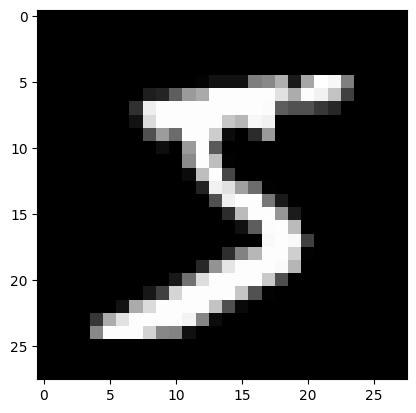

In [88]:
# Display the image with Matpotlib
# Convert to image for display:

img_1 = X[0,].reshape(28,28)
plt.imshow(img_1, cmap='gray').figure.savefig(r'Output/image_1MNIST.png')


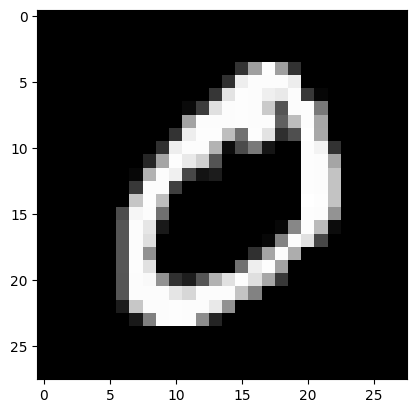

In [89]:
plt.imshow(X[1,].reshape(28,28), cmap='gray').figure.savefig(r'output/image_2MNIST.png')

In [90]:
y[0:5]

array([5, 0, 4, 1, 9], dtype=int64)

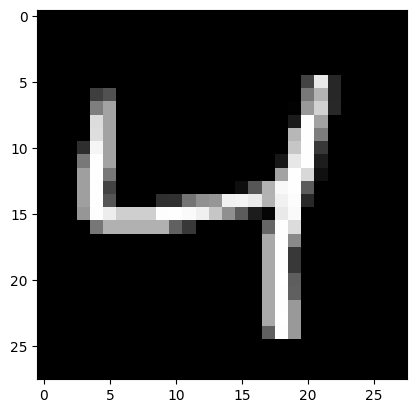

In [91]:
plt.imshow(X[2,].reshape(28,28), cmap='gray').figure.savefig(r'output/image_3MNIST.png')

##### Step 3: Split training and testing samples

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [93]:
X_train.shape

(49000, 784)

In [94]:
X_test.shape

(21000, 784)

In [95]:
y_train.shape

(49000,)

In [96]:
y_test.shape

(21000,)

#### Step 4: Train the Linear Discriminant Analyser:
##### Train the LDA model
##### Transform X into new_X
##### Plot new X Variables
##### Make a few predictions and inspect the results


In [97]:
mnist_model = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [99]:
# Dimensions 0 to 9 therefore N=10
# Transformed X will have N-1 = 9 dimensions

X_transformed = mnist_model.transform(X_train)
X_transformed.shape

(49000, 9)

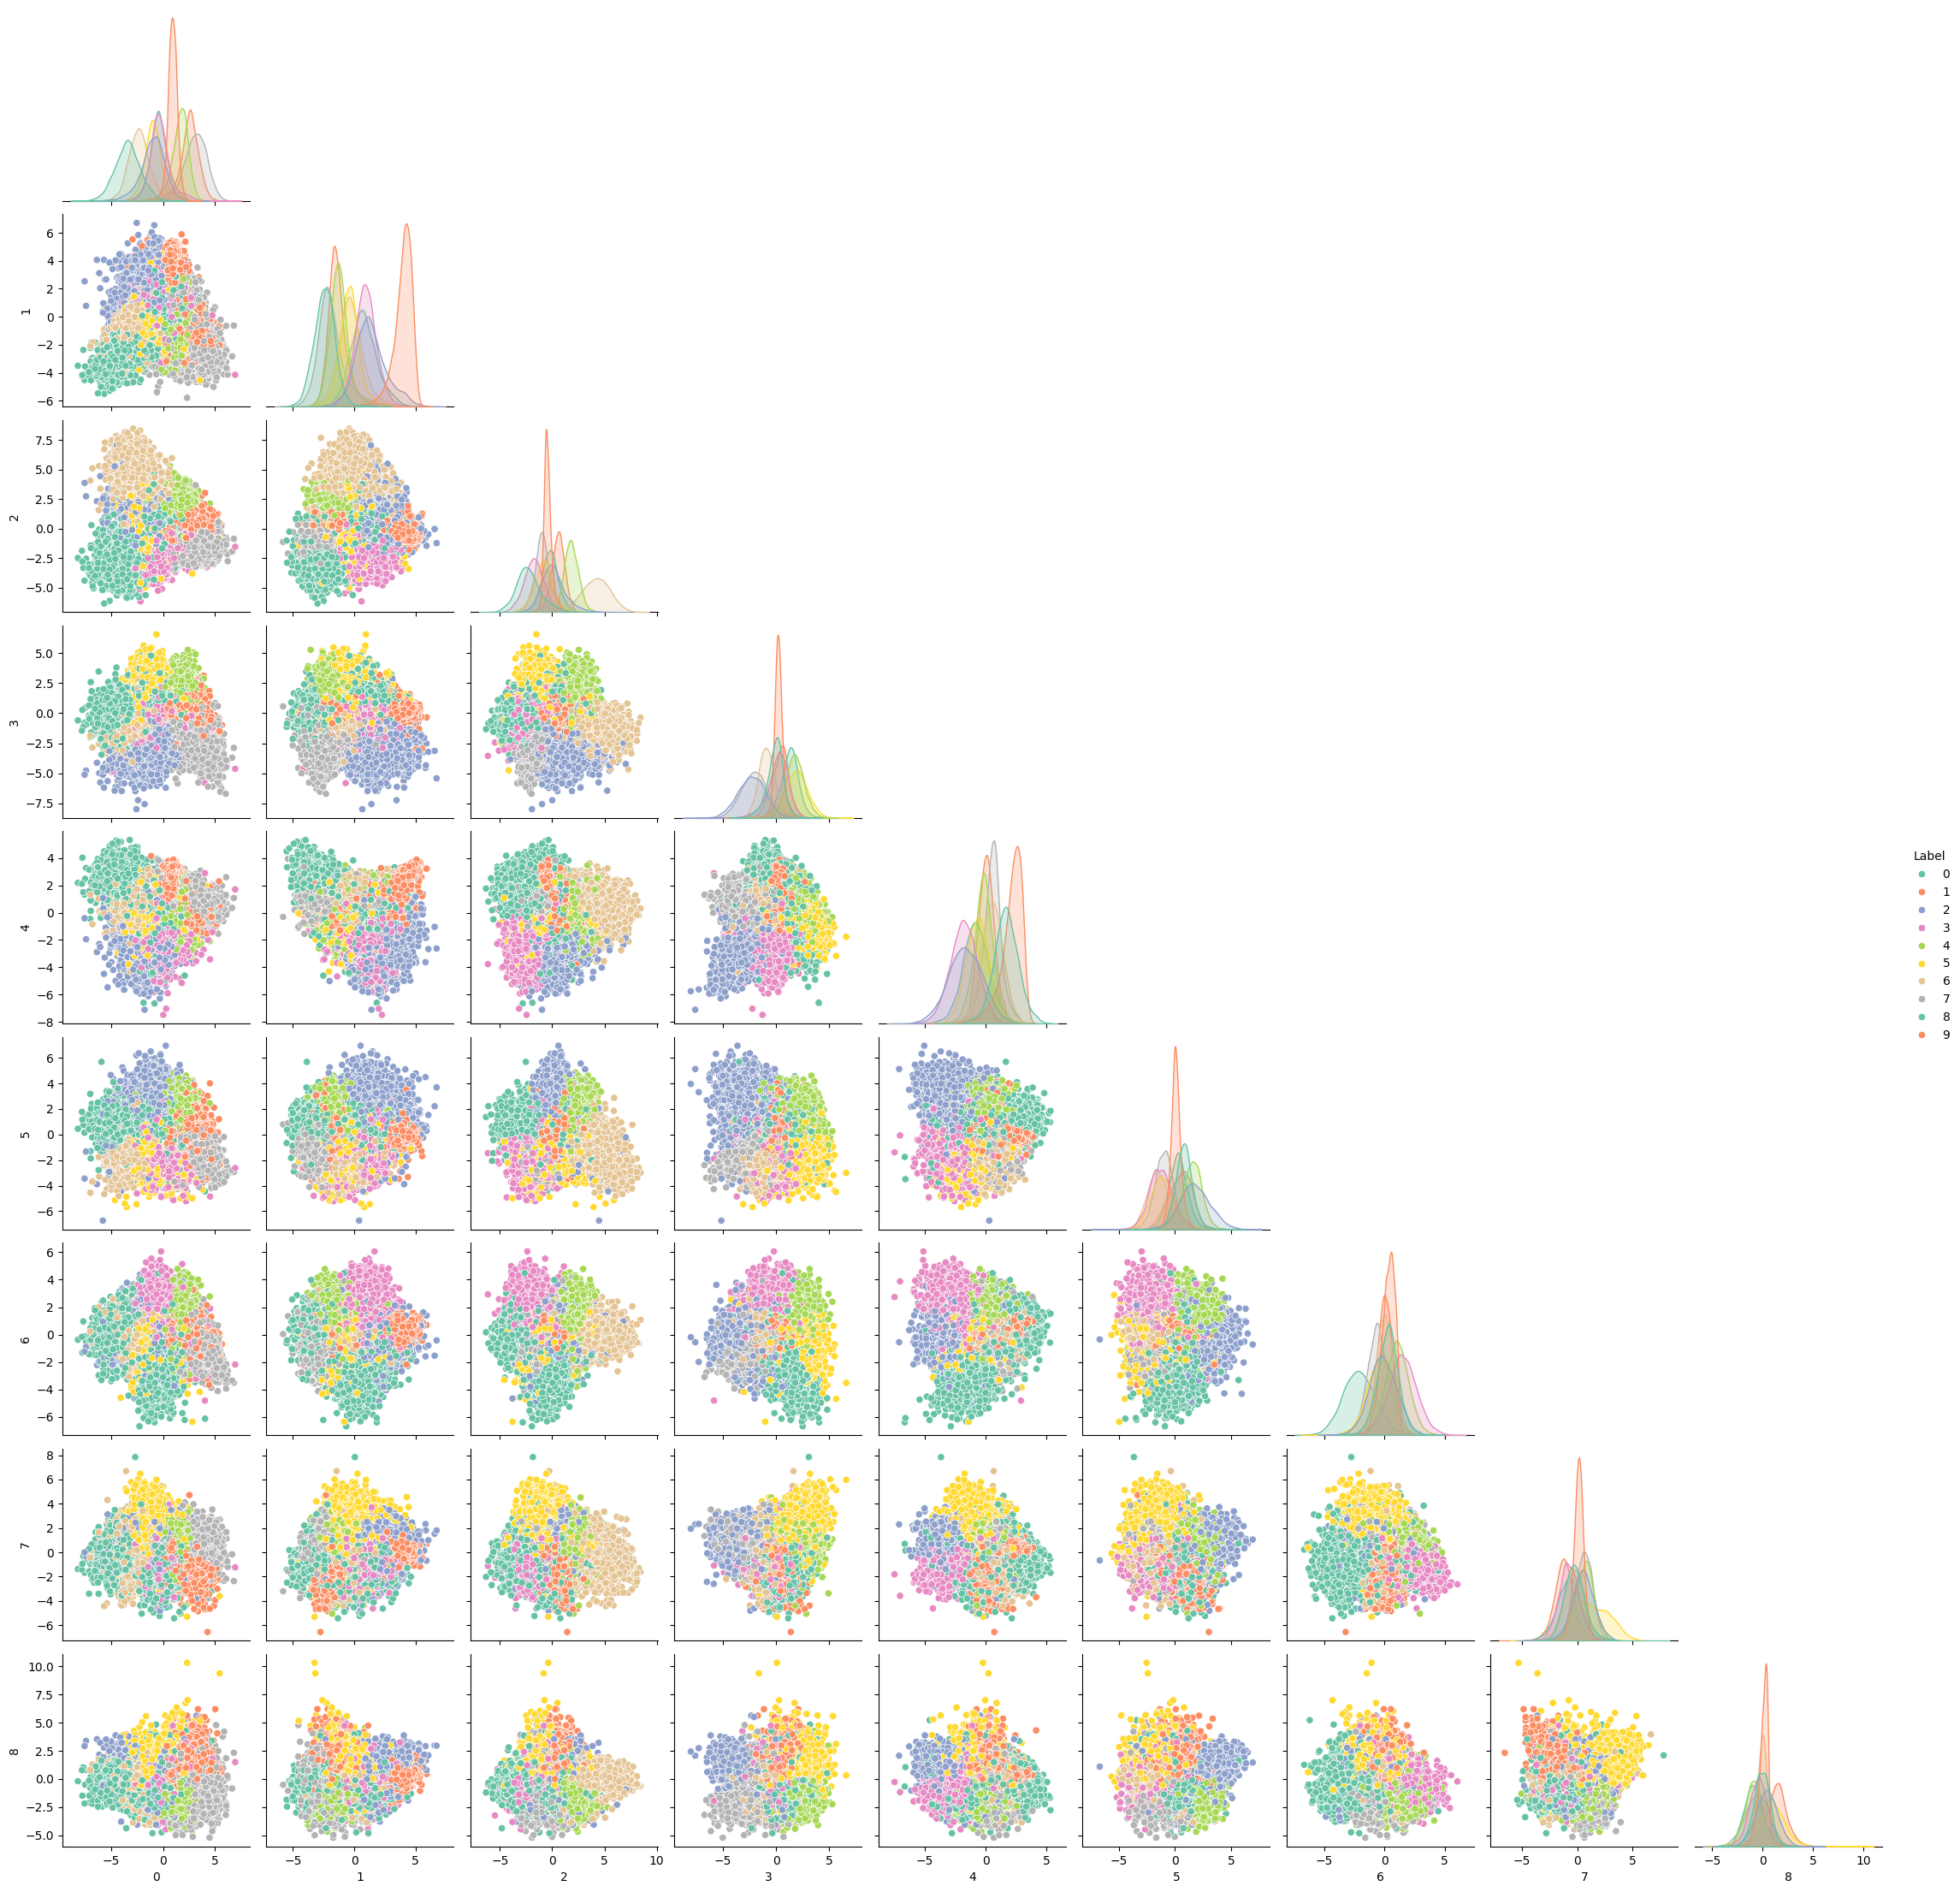

In [100]:
temp_df = pd.DataFrame(X_transformed)
temp_df['Label'] = y_train
# temp_df
sns.pairplot(temp_df, hue='Label', palette='Set2', corner=True )

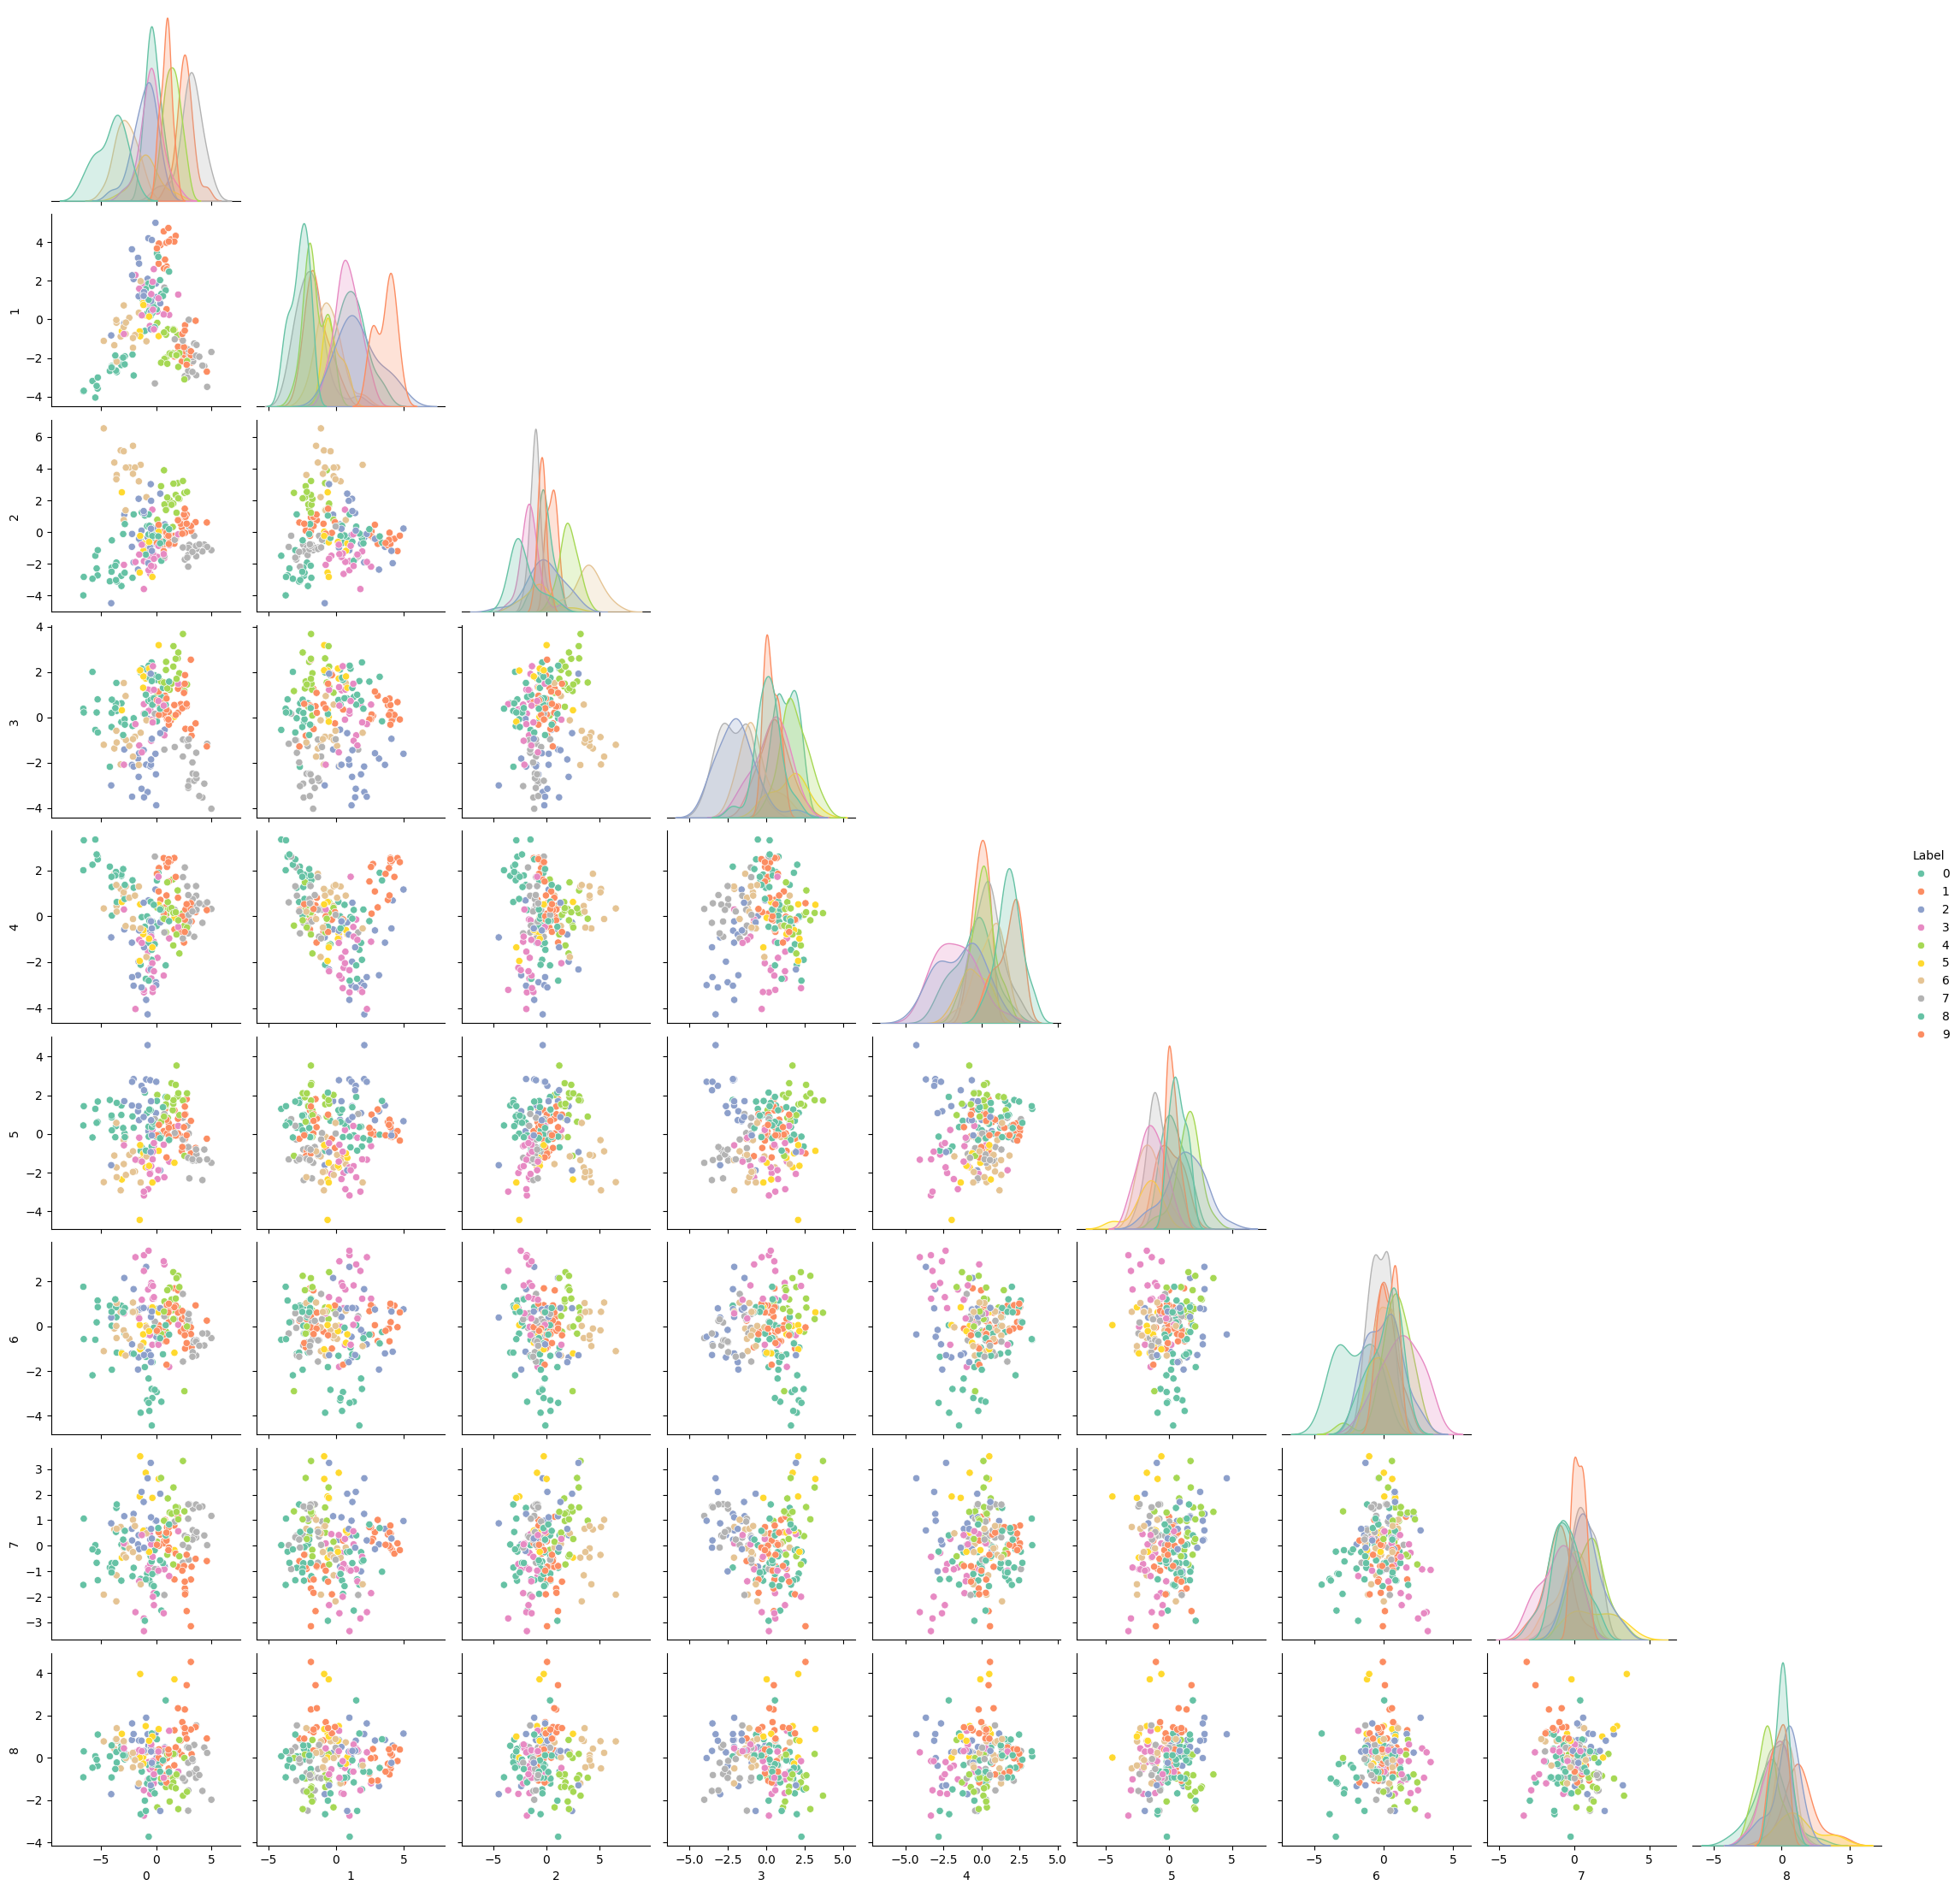

In [101]:
sns.pairplot(temp_df.sample(200), hue='Label', palette='Set2', corner=True ).savefig(r'MNISTPairplotSample200.png')

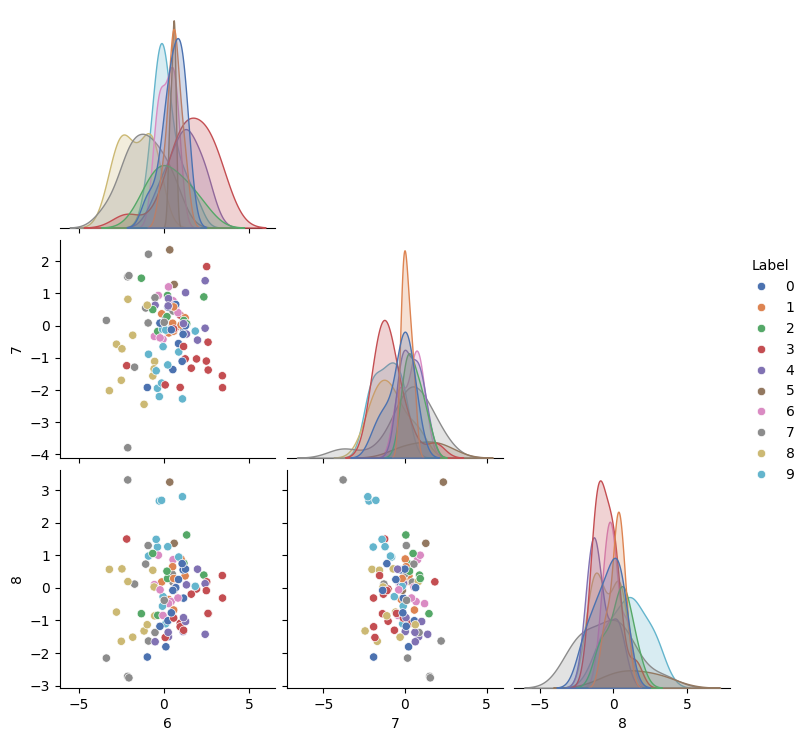

In [102]:
# Is pretty hard to read so better pallette maybe and use a smaller sample:

sns.pairplot(temp_df.loc[:,6:'Label'].sample(100), hue='Label', palette='deep', corner=True ).savefig(r'MNISTPairplotSample100LblOnly.png')

In [110]:
mnist_model.predict(X_train[12301].reshape(1, -1))

array([9], dtype=int64)

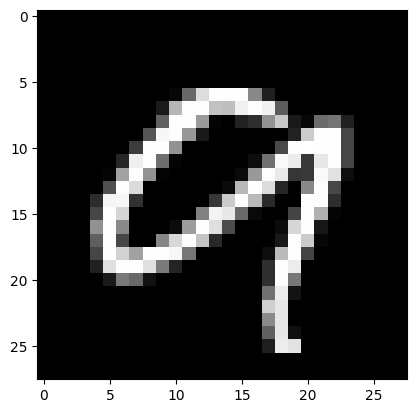

In [109]:
plt.imshow(X_train[12301,].reshape(28,28), cmap='gray')

#### Out Sample Performance Evaluation:
##### Score/Accuracy
##### Confusion Matrix (2 ways)

In [111]:
mnist_model.score(X_train, y_train)

0.8740408163265306

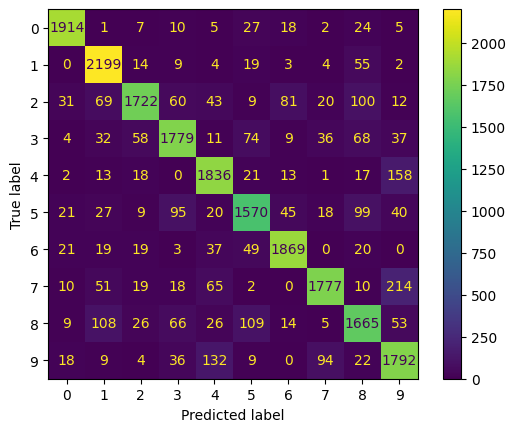

In [115]:
metrics.ConfusionMatrixDisplay.from_estimator(mnist_model, X_test, y_test).figure_.savefig(r'output/ConfMatrMnist.png')

In [71]:
predictions = mnist_model.predict(X_test)
result_test = pd.DataFrame(
    {
        'Actual':y_test,
        'Predicted': predictions
    }
)

In [122]:
result_test.sample(15)

Actual  Predicted
10930       9          9
2755        9          4
12489       2          7
4643        5          5
10082       4          4
16729       1          1
20965       1          1
17110       6          6
3508        2          2
19726       1          1
14655       5          5
20603       8          8
9383        6          6
2158        6          6
17817       5          5

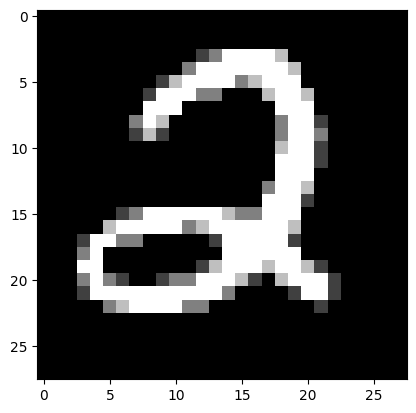

In [123]:
plt.imshow(X_train[12489,].reshape(28,28), cmap='gray')

In [ ]:
~